In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier

#stretch
def bounding(t):
    min_x, min_y, max_x, max_y = 27, 27, 0, 0
    for i in range(28): #row
        for j in range(28): #col
            if (t[i][j] != 0):
                if (i > max_x):
                    max_x = i
                if (i < min_x):
                    min_x = i
                if (j > max_y):
                    max_y = j
                if (j < min_y):
                    min_y = j
    box = t[min_x:(max_x+1),min_y:(max_y+1)].astype(float)
    return resize(box, (20,20)).flatten()

#for partA
def by_nb(train_set, test_data):
    ret_model = []
    for clf in [GaussianNB(), BernoulliNB()]:
        clf.fit(train_set[0], train_set[1])
        ret_model.append(clf.predict(test_data))
    return ret_model

#for partB
def by_random(train_set, nums, depths, test_data):
    ret_model = []
    for i in range(len(nums)):
        clf = RandomForestClassifier(n_estimators=nums[i], max_depth=depths[i])
        clf.fit(train_set[0], train_set[1])
        ret_model.append(clf.predict(test_data))
    return ret_model

def _plot(labels, source):
    ret_img = np.zeros((10, source.shape[1]))
    c_dict, c_list = Counter(labels), []
    for key in sorted(c_dict):
        c_list.append(c_dict[key])
    for i in range(source.shape[0]):
        for j in range(source.shape[1]):
            if(source[i][j] > 0):
                ret_img[labels[i]][j] += source[i][j] * 1/(256 * c_list[labels[i]])
    fig =plt.figure(figsize=(15,15))
    for i in range(10):
        fig.add_subplot(1, 10, i+1)        
        plt.imshow(ret_img[i].reshape((28,28)), cmap="gray")
    plt.show()
        
#to csv
def to_csv(filename, arr):
    with open(filename, 'wt') as csvfile:
        csvfile.write('ImageId,Label')
        for i in range(arr.shape[0]):
            csvfile.write('\n' + str(i) + ',' + str(arr[i]))

In [12]:
#convert data to numpy
source = pd.read_csv("train.csv").as_matrix()
test = pd.read_csv("test.csv", header=None).as_matrix()
#val = pd.read_csv("val.csv").as_matrix()

In [13]:
#train dataset
labels = source[:,1]
untouched = source[:,2:]
streched = np.array([bounding(temp.reshape((28,28))) for temp in untouched]).astype(int)

# #validation dataset
# val_label = val[:,0]
# val_untouch = val[:,1:]
# val_strech = np.array([bounding(temp.reshape((28,28))) for temp in val_untouch]).astype(int)

#strech test dataset
test_strech = np.array([bounding(temp.reshape((28,28))) for temp in test]).astype(int)

train_set_untouch = [untouched, labels]
train_set_strech = [streched, labels]
# val_set_untouch = [val_untouch, val_label]
# val_set_strech = [val_strech, val_label]

In [14]:
# Naive-Bayes
untouch_nb = by_nb(train_set_untouch, test)
strech_nb = by_nb(train_set_strech, test_strech)

In [15]:
# RandomForestClassifier
nums,depths = [10, 10, 30, 30],[4, 16, 4, 16]
untouch_trees = by_random(train_set_untouch, nums, depths, test)
strech_trees = by_random(train_set_strech, nums, depths, test_strech)

In [16]:
#write to files
model_list = untouch_nb + strech_nb + untouch_trees + strech_trees
file_names = ['_1.csv','_3.csv', '_2.csv','_4.csv',
              '_5.csv','_7.csv', '_9.csv','_11.csv',
              '_6.csv','_8.csv', '_10.csv','_12.csv']
for i in range(len(file_names)):
    to_csv(file_names[i], model_list[i])

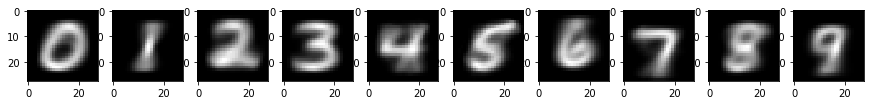

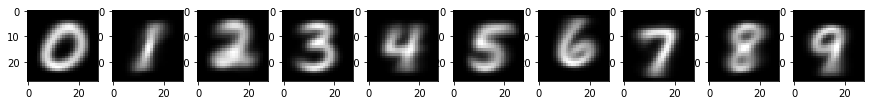

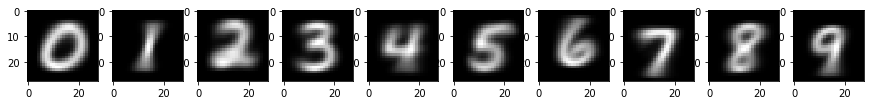

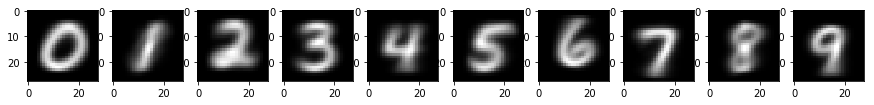

In [17]:
#plot image
_plot(untouch_nb[0], test)
_plot(strech_nb[0], test)
_plot(untouch_nb[1], test)
_plot(strech_nb[1], test)

In [18]:
(1,2)*(3,4)

TypeError: can't multiply sequence by non-int of type 'tuple'